In [1]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

'[' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


KeyboardInterrupt: 

In [35]:
from fastbook import *
from fastai.vision.widgets import *

In [36]:
key = os.environ.get('AZURE_SEARCH_KEY', 'ee459eb73d9d49938435ab68ec39e3b6')

In [70]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']


In [38]:
search_images_bing

<function fastbook.search_images_bing(key, term, min_sz=128, max_images=150)>

In [51]:
poisonous_plant_types = '黃花夾竹桃','雷公藤','巴豆','白花曼陀羅','雞母珠'
path = Path('poisonous_plant')

In [52]:
if not path.exists():
    path.mkdir()
    for o in poisonous_plant_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} 植物')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [53]:
fns = get_image_files(path)
fns

(#642) [Path('poisonous_plant/巴豆/0060abd0-a043-43a0-8149-4cd255e828d6.jpg'),Path('poisonous_plant/巴豆/00be215c-8a7e-4204-96bb-1e90c8860e93.jpg'),Path('poisonous_plant/巴豆/05111ef3-959a-46e9-8a80-450e82009f43.jpg'),Path('poisonous_plant/巴豆/07cef7df-c5c0-4654-8a29-ecc539fc9f88.jpg'),Path('poisonous_plant/巴豆/08fa59be-88e2-461f-9083-913641fcac7f.jpg'),Path('poisonous_plant/巴豆/096d3ce6-7030-438e-9db5-c61fc97ef421.jpg'),Path('poisonous_plant/巴豆/0bbca8fe-b82a-4b9f-8c8d-dcdb6dbdf287.jpg'),Path('poisonous_plant/巴豆/0bbf525d-df0e-431d-9ed1-a5515e6e0ad5.jpg'),Path('poisonous_plant/巴豆/0cea56d1-2965-4b23-9639-81cfa075cdd8.jpg'),Path('poisonous_plant/巴豆/0d56a327-7bed-4b3d-be9d-35df2f4ce82e.jpg')...]

In [54]:
failed = verify_images(fns)
failed

(#4) [Path('poisonous_plant/巴豆/503b88f4-5efb-4055-bf2c-9ab2a5c28f97.png'),Path('poisonous_plant/雷公藤/b0720e43-4d3f-42a4-b825-19d534860713.jpg'),Path('poisonous_plant/雷公藤/d8f5c68e-0f2b-4678-8295-21274714f227.jpg'),Path('poisonous_plant/雷公藤/f32b8a6a-36a3-4d7b-a26a-6f67047d6cb6.jpeg')]

In [55]:
failed.map(Path.unlink)

(#4) [None,None,None,None]

In [56]:
from PIL import Image
import os

for o in poisonous_plant_types:
    image_dir = (path/o)
    for filename in os.listdir(image_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"): 
            img_path = os.path.join(image_dir, filename)
            img = Image.open(img_path)
            if img.mode == 'P':
                print(f"Deleting image: {filename}")


Deleting image: 1ddbf06e-1865-4e51-b6b3-fa4139a1ea0d.png
Deleting image: 9adcdb1d-79fd-4eb8-bd48-7e555979a778.jpg
Deleting image: 0a36a162-4cce-4f47-9a97-3259da67771a.png
Deleting image: e875a405-861b-4a2a-a063-0e2ced5087e7.png


In [57]:
poisonous_plant = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [58]:
dls = poisonous_plant.dataloaders(path)

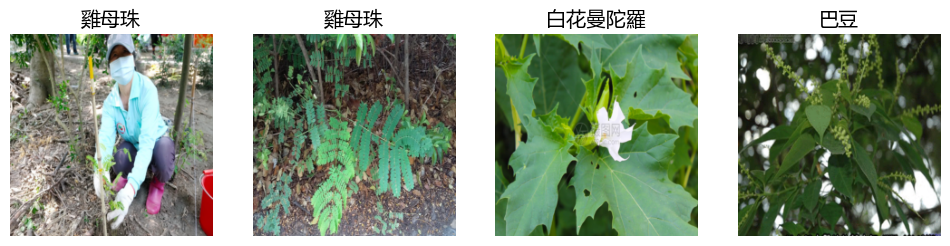

In [71]:
dls.valid.show_batch(max_n=4, nrows=1)

In [60]:
poisonous_plant = poisonous_plant.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = poisonous_plant.dataloaders(path)

In [61]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.316973,1.097840,0.456693,00:24


epoch,train_loss,valid_loss,error_rate,time
0,1.342385,0.890135,0.299213,00:28
1,1.097057,0.839898,0.251969,00:29
2,0.902080,0.781386,0.228346,00:37
3,0.779735,0.779356,0.228346,00:31


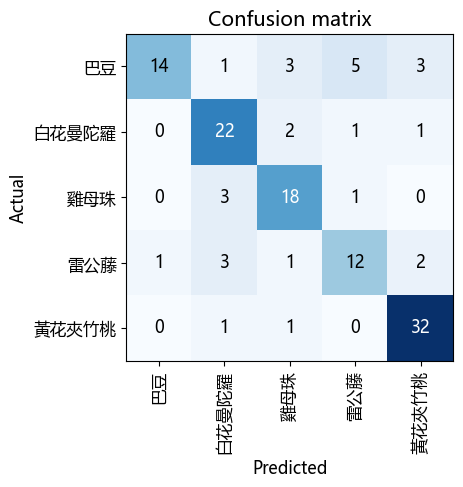

In [62]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [63]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [64]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [65]:
poisonous_plant = poisonous_plant.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = poisonous_plant.dataloaders(path)

In [66]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(8)

epoch,train_loss,valid_loss,error_rate,time
0,2.521986,1.068607,0.456693,00:27


epoch,train_loss,valid_loss,error_rate,time
0,1.324289,0.952854,0.338583,00:37
1,1.156547,0.853380,0.267717,00:32
2,1.009077,0.801872,0.236220,00:32
3,0.840036,0.738715,0.220472,00:37
4,0.723754,0.722501,0.244094,00:32
5,0.623168,0.688630,0.220472,00:32
6,0.548611,0.686424,0.220472,00:30
7,0.494343,0.687100,0.204724,00:44


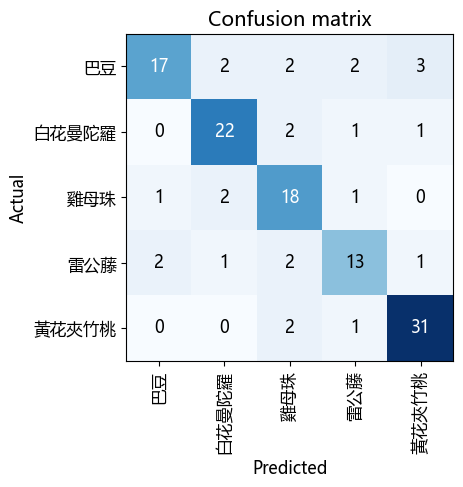

In [68]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

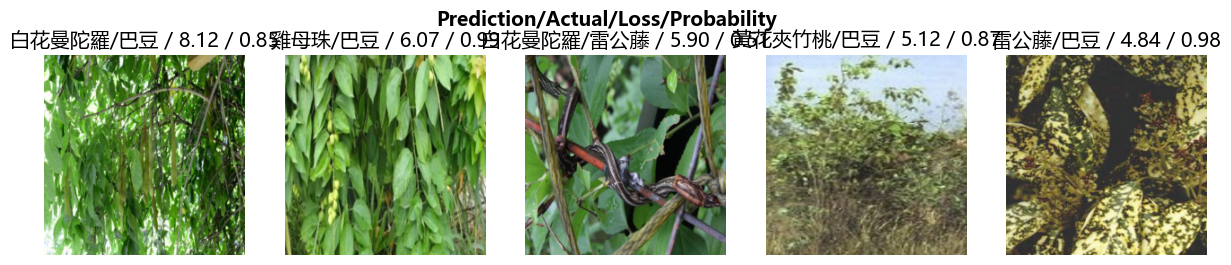

In [67]:
interp.plot_top_losses(5, nrows=1)

In [69]:
learn.export()

In [72]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]